In [231]:
import os
import cv2
from PIL import Image
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

In [232]:
%config Completer.use_jedi = False

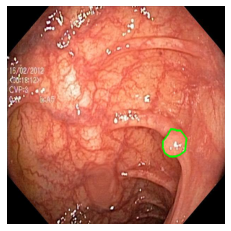

In [233]:
# refer to: https://segmentfault.com/a/1190000015662096
def draw_counter(image_path, mask_path):
    
    image = io.imread(image_path)
    
    if os.path.splitext(mask_path)[-1] == ".tif":
        mask = io.imread(mask_path, as_gray=True)
    else:
        mask = io.imread(mask_path, as_gray=True)*255
    mask = mask.astype(np.uint8)
    
    ret, thresh = cv2.threshold(mask, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    
    # yellow: rgb [255, 255, 0]
    # red: rgb [255, 0, 0]
    # blue: rgb [0, 0, 255]
    # green: rgb [0, 255, 0]
    image_contour = cv2.drawContours(image, [cnt], 0, (0, 255, 0), 3)
    
    return image_contour

if __name__ == "__main__":
    
    image_path = "/media/hdd/PolySeg_old/data/oldKvasir-SEG/images/cju1f79yhsb5w0993txub59ol.jpg"
    mask_path = "/media/hdd/PolySeg_old/data/oldKvasir-SEG/masks/cju1f79yhsb5w0993txub59ol.jpg"
    
    outimg = draw_counter(image_path, mask_path)
    outimg = Image.fromarray(outimg).resize((352, 352),Image.ANTIALIAS)
    
    #
    outimg.save('./img5.pdf')

    plt.imshow(outimg)
    plt.axis('off')
    

In [ ]:
# Kvasir-SEG
# cju0qx73cjw570799j4n5cjze.jpg
# cju76o55nymqd0871h31sph9w
# cju1fyb1d69et0878muzdak9u
# cju1f79yhsb5w0993txub59ol